# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [1]:
import re

import numpy as np
import pandas as pd
#you may want to import some other modules here such as seaborn or matplotlib

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
%%bash
ls ml-latest-small/

README.txt
links.csv
movies.csv
ratings.csv
tags.csv


In [6]:
%%bash
 head  ./ml-latest-small/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [7]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any of the columns are null

In [8]:
# write pandas code here
print(movie.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


# Q 2 (.25 point) Check datatype of each of the columns

In [9]:
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on series genres, build following  unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [10]:
# write pandas code here
unique_genre = set([g for row in movie["genres"].str.split("|").tolist() for g in row])
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [11]:
# write pandas code here
for g in unique_genre:
    movie[g] = movie["genres"].str.contains(g)
movie.head()

C:\Users\benja\AppData\Local\Temp/ipykernel_25952/3093493409.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  movie[g] = movie["genres"].str.contains(g)


,movieId,title,genres,Musical,Mystery,Fantasy,Animation,Sci-Fi,Romance,Documentary,...,Comedy,Children,Adventure,(no genres listed),Drama,Horror,Western,IMAX,Crime,War
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,True,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# Q5(1 point) Build a "year" column in movie data frame. The title "year" should be embedded in title columns.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [12]:
# write pandas code here
year_re = "\.*\((\d{4})\.*"
movie["year"] = movie["title"].str.extract(year_re)
# treat 0 as na
movie["year"].fillna("0", inplace=True)
movie["year"] = movie["year"].apply(int)
movie.sample(30)[["title","year"]]
# movie[movie["year"].isna()]["title"]

,title,year
7366,Endgame (2009),2009
8590,Jurassic World (2015),2015
7594,Mildred Pierce (2011),2011
7288,Frozen (2010),2010
1898,Airport '77 (1977),1977
6099,"New World, The (2005)",2005
7490,Trash Humpers (2009),2009
4426,Swimming Pool (2003),2003
9372,Miss Peregrine's Home for Peculiar Children (2...,2016
9707,Jurassic World: Fallen Kingdom (2018),2018


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

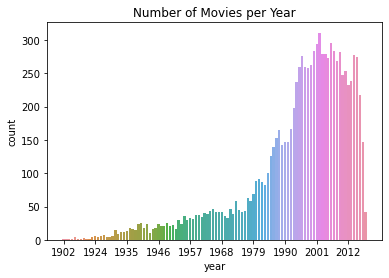

In [13]:
# write code here.
import seaborn as sns
import matplotlib.pyplot as plt
movie_counts = pd.DataFrame(movie[movie["year"]>0].groupby(["year"])["movieId"].count())
movie_counts = movie_counts.rename(columns={"movieId":"count"})
movie_counts = movie_counts.reset_index()
movie_counts.columns
movie_counts
sns.barplot(x="year", y="count", data=movie_counts)
plt.title("Number of Movies per Year")
plt.locator_params(axis="x", nbins=10)
#plt.xticks(range(movie["year"].min(), movie["year"].max(),10))
# movie_counts["year"].min()

there was a rapid increase in the number of movies per year around 1980, but that has reversed after 2001. The decrease is slower than the increase.

# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

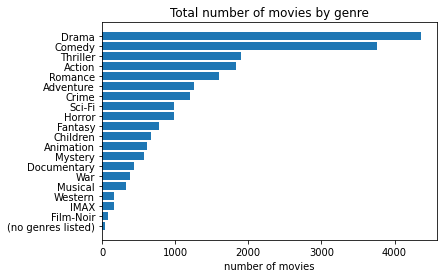

In [14]:
count_by_genre = pd.DataFrame(movie[list(unique_genre)].sum())
count_by_genre.columns=["count"]
count_by_genre = count_by_genre.sort_values(by="count")
plt.barh(count_by_genre.index, count_by_genre["count"])
plt.xlabel("number of movies")
plt.title("Total number of movies by genre")
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [15]:
 # write pandas code here
import re
year_with_paren = "\.*\(\d*\)"
def drop_year(title):
    new_title = re.sub(year_with_paren, "", title)
    return new_title.strip()
movie["movie_title"] = movie["title"].apply(drop_year)
movie_wo_title = movie.drop("title", axis=1)
movie_wo_title.sample(20)

,movieId,genres,Musical,Mystery,Fantasy,Animation,Sci-Fi,Romance,Documentary,Thriller,...,Adventure,(no genres listed),Drama,Horror,Western,IMAX,Crime,War,year,movie_title
8729,127098,Comedy,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2015,Louis C.K.: Live at The Comedy Store
1060,1377,Action|Crime,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1992,Batman Returns
881,1176,Drama|Fantasy|Romance,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,1991,"Double Life of Veronique, The (Double Vie de V..."
6844,61628,Drama,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,2005,Sunflower (Xiang ri kui)
3167,4262,Action|Crime|Drama,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,1983,Scarface
6558,54999,Action|Comedy|Crime,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,2007,Shoot 'Em Up
2551,3415,Drama,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,1975,"Mirror, The (Zerkalo)"
8954,136778,Comedy|Drama,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,2015,The Squeeze
7622,87287,Documentary,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,2010,American Grindhouse
636,809,Action|Adventure,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,1996,Fled


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

In [16]:
# Write your code here.
paren_re = ".*(\(.*\)).*"
def word_count(title):
    # only count words that fall outside a foreign title which appears inside ()'s
    m = re.search(paren_re, title)
    if m is not None:
        g = m.groups()[0]
        mod_title = title.replace(g, "").strip()
    else:
        mod_title = title
    return len(mod_title.split(" "))
count_columns = {}
for g in list(unique_genre):
    col_name = f'wc_{g}'
    count_columns[g] = col_name
    movie_wo_title[col_name] = movie_wo_title[movie_wo_title[g]]["movie_title"].apply(word_count)
movie_wo_title[movie_wo_title["movie_title"].str.contains("(", regex=False)].head(10)

,movieId,genres,Musical,Mystery,Fantasy,Animation,Sci-Fi,Romance,Documentary,Thriller,...,wc_Comedy,wc_Children,wc_Adventure,wc_(no genres listed),wc_Drama,wc_Horror,wc_Western,wc_IMAX,wc_Crime,wc_War
28,29,Adventure|Drama|Fantasy|Mystery|Sci-Fi,False,True,True,False,True,False,False,False,...,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
29,30,Crime|Drama,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN
31,32,Mystery|Sci-Fi|Thriller,False,True,False,False,True,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,47,Mystery|Thriller,False,True,False,False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,58,Comedy|Drama|Romance,False,False,False,False,False,True,False,False,...,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
60,68,Comedy|Romance,False,False,False,False,False,True,False,False,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,80,Children|Drama,False,False,False,False,False,False,False,False,...,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
74,82,Comedy|Drama,False,False,False,False,False,False,False,False,...,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
86,97,Crime|Drama,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
94,106,Comedy|Drama,False,False,False,False,False,False,False,False,...,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [17]:
unique_genre_list = list(unique_genre)
years = list(range(movie[movie["year"]>0]["year"].min(), movie["year"].max()+1))
plot_df = pd.DataFrame({"year": [], "avg_word_count":[], "genre": []})
for i in range(5):
    for j in range(4):
        index = (i*4) + j
        avg_wc_df = pd.DataFrame(movie_wo_title["year"])
        group_name = unique_genre_list[index]
        wc_col_name = f'wc_{group_name}'
#       print(group_name)
        df = pd.DataFrame(movie_wo_title.loc[(movie_wo_title[group_name]) & (movie_wo_title["year"]>0)].groupby(["year"])[f'{wc_col_name}'].mean())
        df = df.rename(columns={wc_col_name: "avg_word_count"})
        df.reset_index(inplace=True)
        df["genre"] = np.repeat(group_name, df.shape[0])
        plot_df = pd.concat([plot_df, df], ignore_index=True)
        # print(df)
        # print(f'{group_name} has {df.shape}, min year {df["year"].min()}, max year {df["year"].max()}')
        # print(df)
#        for g, wc_col in count_columns.items():
#            avg_wc_df[g] = movie_wo_title[movie_wo_title[g]].groupby(["year"])[wc_col].mean()
#        avg_wc_df[avg_wc_df["Comedy"].notna()].sort_values(by="year")


Text(0.5, 1.0, 'Avg Title Word Count')

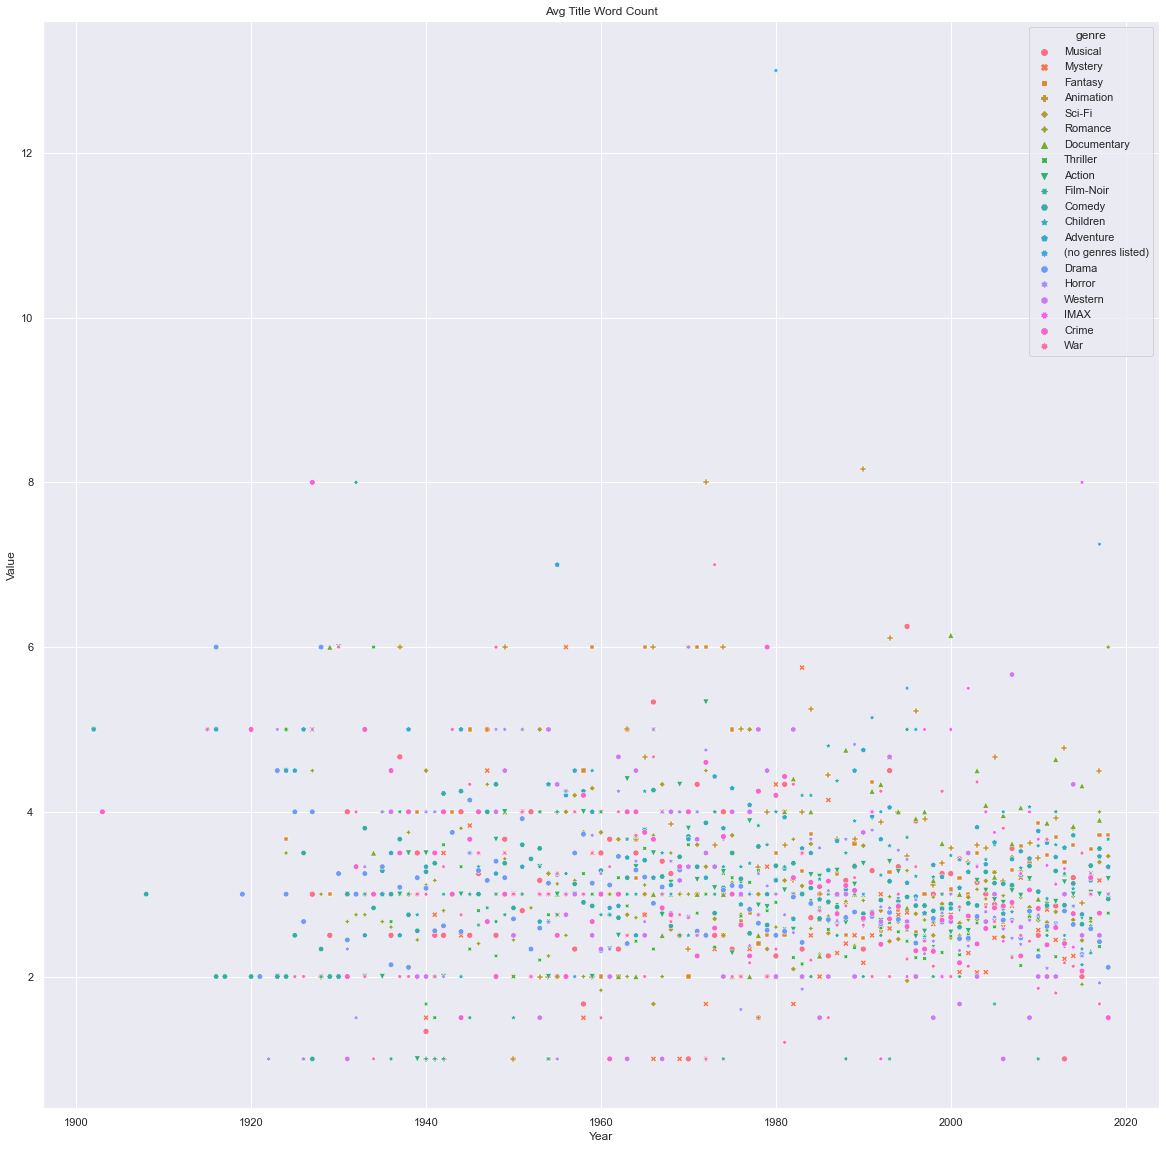

In [18]:
sns.set(rc={"figure.figsize":(20,20)})
lp = sns.scatterplot(x='year',y="avg_word_count", ci=None, hue="genre", style="genre",  data=plot_df)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Avg Title Word Count")

Observation : There is not a lot of variation in avg title word count across the genres or by year.